## Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения задачи регрессии.

В качестве набора данных мы будем использовать набор данных по продажам домов в США за Май 2014 - Май 2015 - hhttps://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv

Датасет состоит из 1 файла:
kc_house_data.csv

Файл описывает следующие колонки:

id - уникальный id продажи дома \
date - дата продажи дома \
price - цена продажи дома \
bedrooms - кол-во спальных комнат \
bathrooms - кол-во ванных комнат (где .5 считается за комнату с туалетом без душа) \
sqft_living - жилая площадь(кв. футах) \
sqft_lot - площать земли \
floors - кол-во этажей \
waterfront - рядом с водой (1 или 0) \
view - хороший вид (от 0 или 4) \
condition - условия апартаметов (от 1 до 5) \
grade - оценка (от 1 до 13) \
sqft_above - площадь пространства, выше земли \
sqft_basement - площадь пространства, ниже земли(подвал) \
yr_built - год постройки \
yr_renovated - год реновации \
zipcode - почтовый код \
lat - долгота (координаты) \
long - широта (координаты) \
sqft_living15 - площадь внутренней жилой площади для ближайших 15 соседей \
sqft_lot15 - площадь земли для ближайших 15 соседей

В рассматриваемом примере будем решать задачу регрессии - целевой признак 'price' - цена

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from IPython.display import Image

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

Файл представляет собой данные в формате CSV. Разделитель - ','

In [2]:
data = pd.read_csv("data/kc_house_data.csv", sep=',')

## Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.

In [3]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [4]:
data.shape

(21613, 21)

In [5]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Вывод: исходный набор данных данных не содержит пропусков**

### Построение графиков для понимания структуры данных

Сразу удалим ненужные столбцы - уникальный id и уникальную дату.

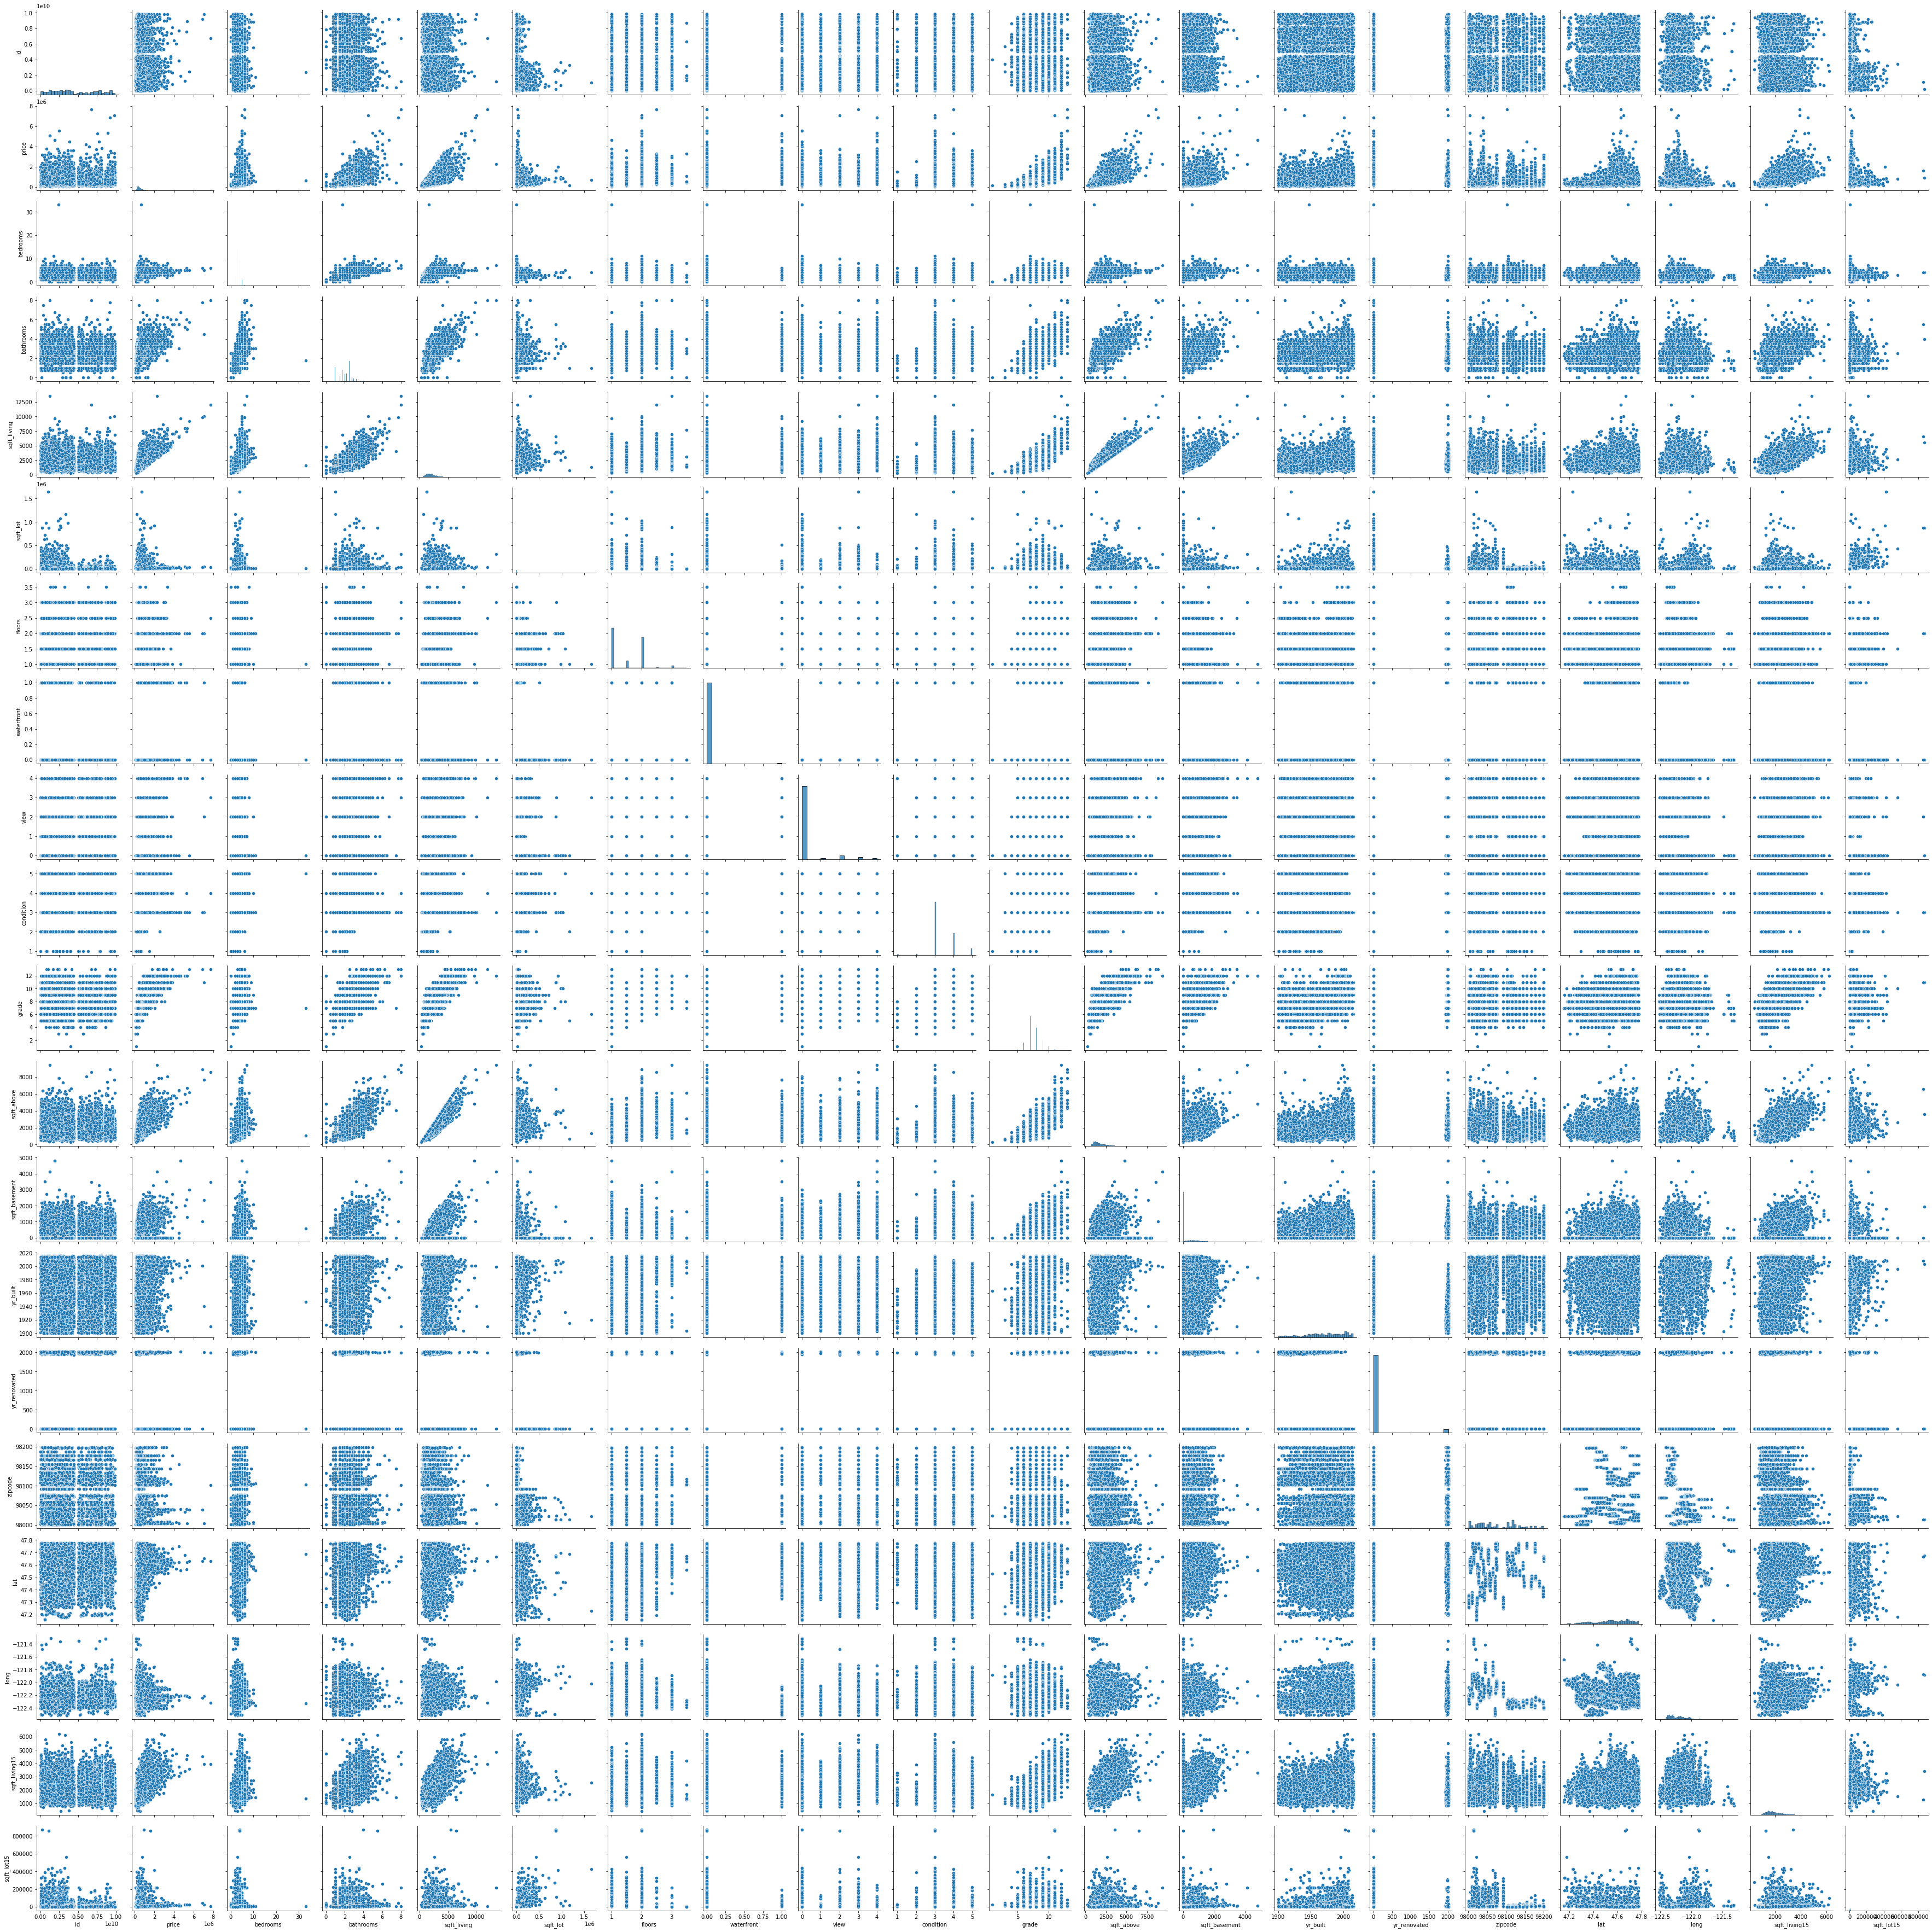

In [7]:
sns.pairplot(data)

In [8]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

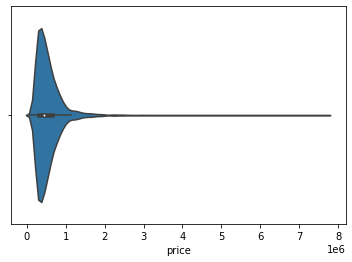

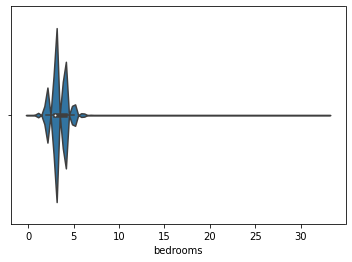

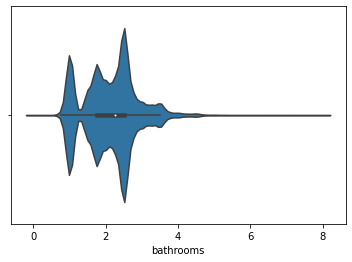

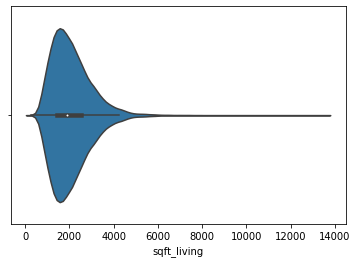

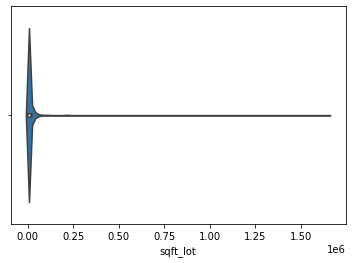

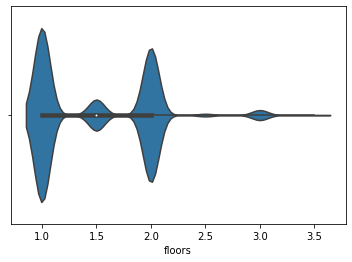

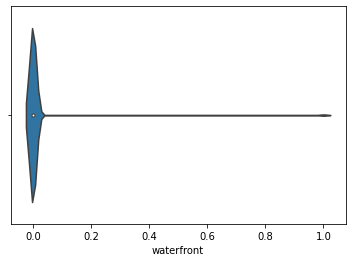

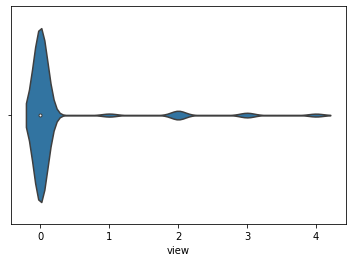

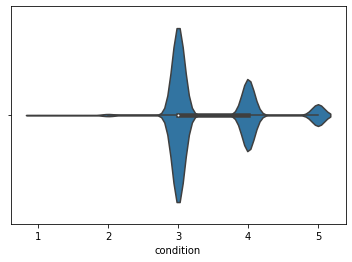

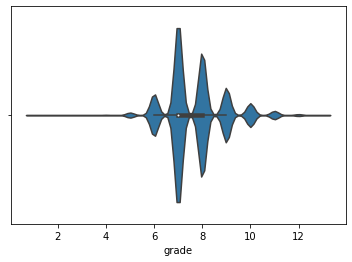

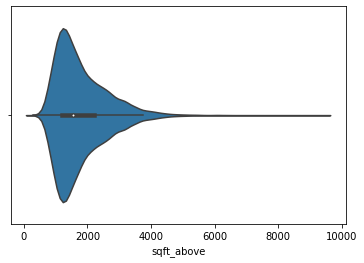

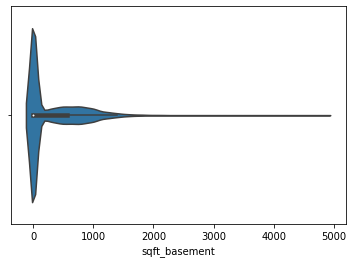

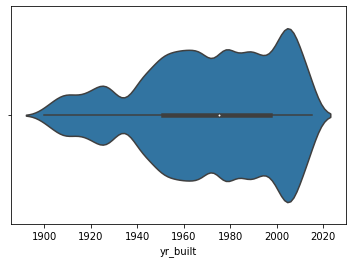

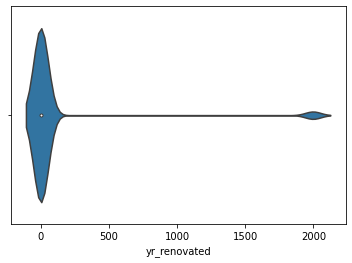

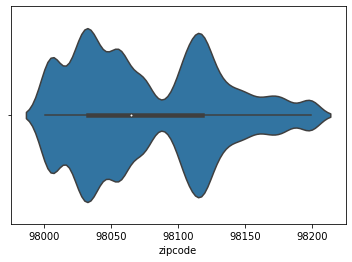

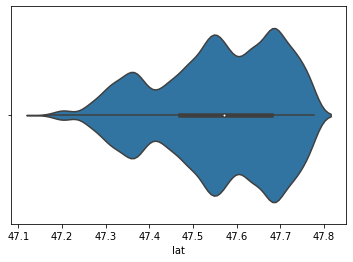

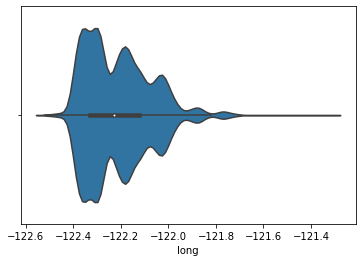

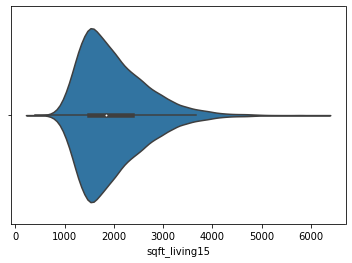

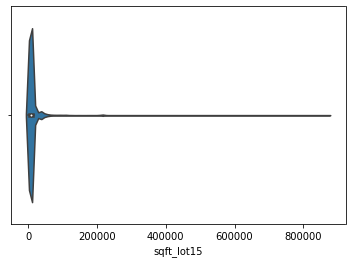

In [9]:
# Скрипичные диаграммы для числовых колонок
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']:
    sns.violinplot(x=data[col])
    plt.show()

## Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.

In [10]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Пока для построения модели будем использовать все признаки, кроме 'date', т.к. не рассматриваем нашу модель как временную, и 'id', т.к. он содержит уникальынй id покупки, который мы не рассматриваем в модели вообще.

In [11]:
data.drop(['id', 'date'], axis=1, inplace=True)

Категориальные признаки отсутствуют, их кодирования не требуется(date не рассматриваем).

Вспомогательные признаки для улучшения качества моделей в данном примере мы строить не будем.

Выполним масштабирование данных(построим корреляционную карту, чтобы сравнить её с полученной в корреляционном анализе).

<AxesSubplot:>

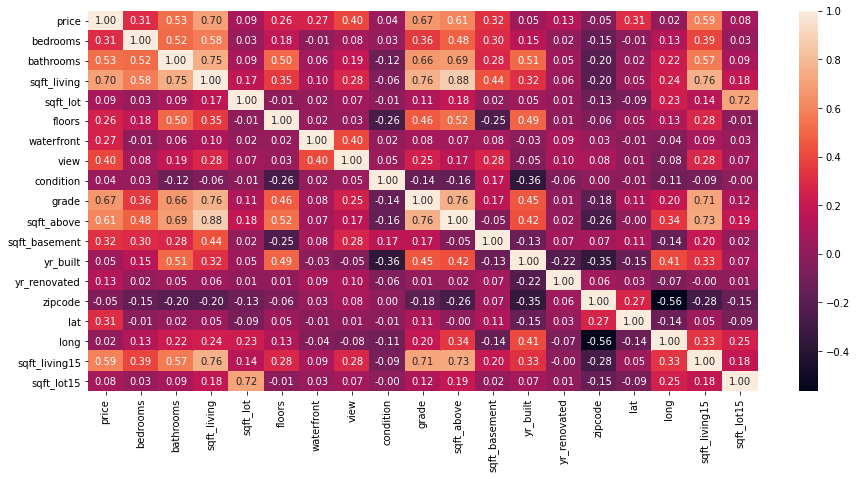

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [13]:
# Числовые колонки для масштабирования
scale_cols = ['sqft_living', 'sqft_lot', 'sqft_above',
              'sqft_basement', 'lat', 'long',
              'sqft_living15', 'sqft_lot15', 'bedrooms', 
              'bathrooms', 'view', 'grade', 'floors', 'yr_renovated', 'yr_built', 'condition'
             ]

In [14]:
sc = MinMaxScaler()
sc_data = sc.fit_transform(data[scale_cols])

In [15]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc_data[:,i]

In [16]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  sqft_living15_scaled  sqft_lot15_scaled  \
0     0          3      7  ...              0.161934           0.005742   
1     0          3      7  ...              0.222165           0.008027   
2     0          3      6  ...              0.399415           0.008513   
3     0          5      7  ...              0.165376           0.004996   
4     0          3      8  ...              0.241094           0.007871   

   bedrooms_scaled  bathrooms_scaled  view_scaled  grade_scaled  \
0         0.090909           0.12500          0.0      0.500000   
1         0.090909           0.28125          0.0      0.500000   
2         0.060606           0.12500          0.0      0.416667   
3         0.121212           0.37500          0.0      0.500000   
4         0.090909           0.25000          0.0      0.583333   

   floors_scaled  yr_renovated_scaled  yr_built_scaled  condition_scaled  
0            0.0             0.000000         0.478261               0.5  
1            0.4             0.988089         0.443478               0.5  
2            0.0             0.000000         0.286957               0.5  
3            0.0             0.000000         0.565217               1.0  
4            0.0             0.000000         0.756522               0.5  

[5 rows x 35 columns]

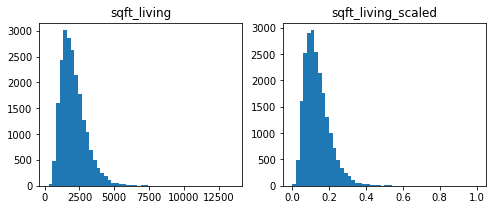

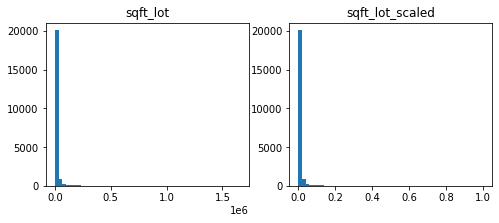

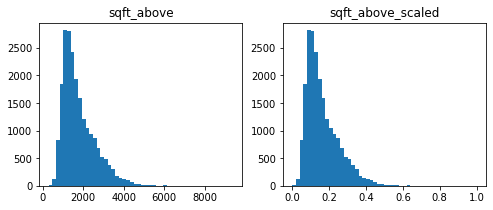

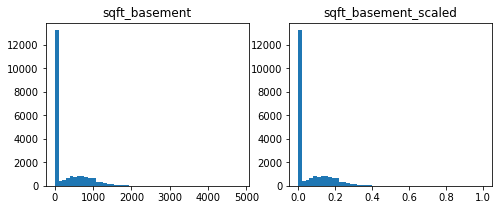

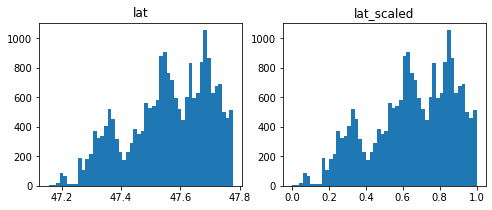

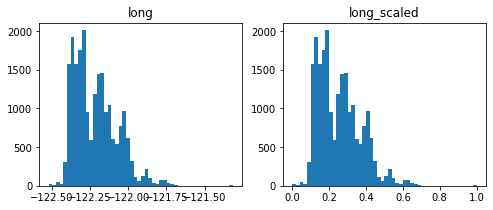

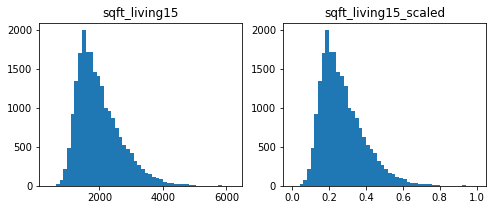

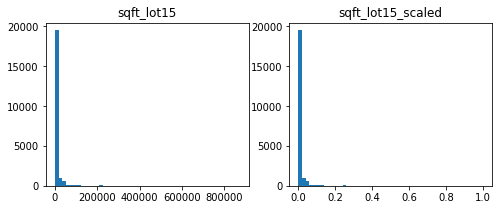

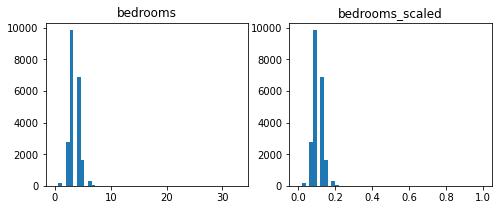

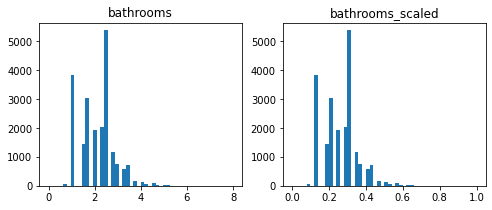

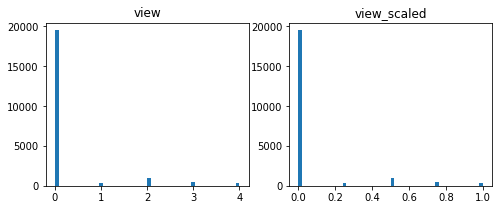

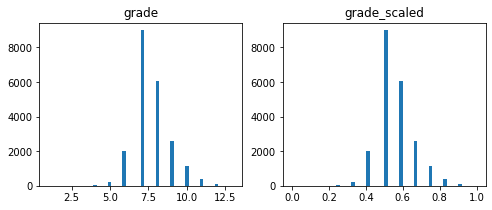

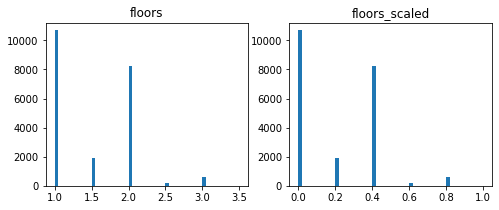

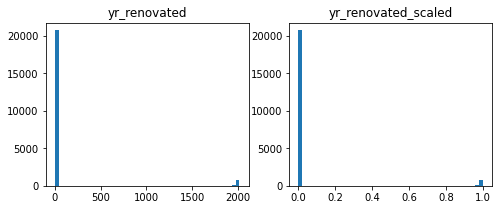

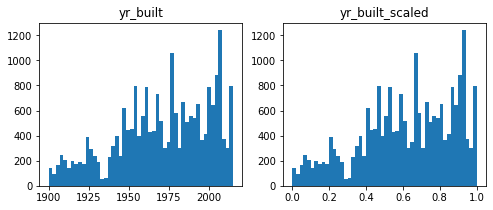

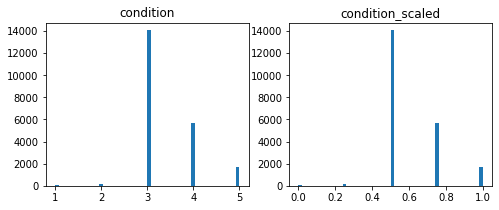

In [17]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Удалим стаыре столбцы.

In [18]:
data.drop(scale_cols, axis=1, inplace=True)

In [19]:
data.head()

price  waterfront  zipcode  sqft_living_scaled  sqft_lot_scaled  \
0  221900.0           0    98178            0.067170         0.003108   
1  538000.0           0    98125            0.172075         0.004072   
2  180000.0           0    98028            0.036226         0.005743   
3  604000.0           0    98136            0.126038         0.002714   
4  510000.0           0    98074            0.104906         0.004579   

   sqft_above_scaled  sqft_basement_scaled  lat_scaled  long_scaled  \
0           0.097588              0.000000    0.571498     0.217608   
1           0.206140              0.082988    0.908959     0.166113   
2           0.052632              0.000000    0.936143     0.237542   
3           0.083333              0.188797    0.586939     0.104651   
4           0.152412              0.000000    0.741354     0.393688   

   sqft_living15_scaled  sqft_lot15_scaled  bedrooms_scaled  bathrooms_scaled  \
0              0.161934           0.005742         0.090909           0.12500   
1              0.222165           0.008027         0.090909           0.28125   
2              0.399415           0.008513         0.060606           0.12500   
3              0.165376           0.004996         0.121212           0.37500   
4              0.241094           0.007871         0.090909           0.25000   

   view_scaled  grade_scaled  floors_scaled  yr_renovated_scaled  \
0          0.0      0.500000            0.0             0.000000   
1          0.0      0.500000            0.4             0.988089   
2          0.0      0.416667            0.0             0.000000   
3          0.0      0.500000            0.0             0.000000   
4          0.0      0.583333            0.0             0.000000   

   yr_built_scaled  condition_scaled  
0         0.478261               0.5  
1         0.443478               0.5  
2         0.286957               0.5  
3         0.565217               1.0  
4         0.756522               0.5

## Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения

<AxesSubplot:>

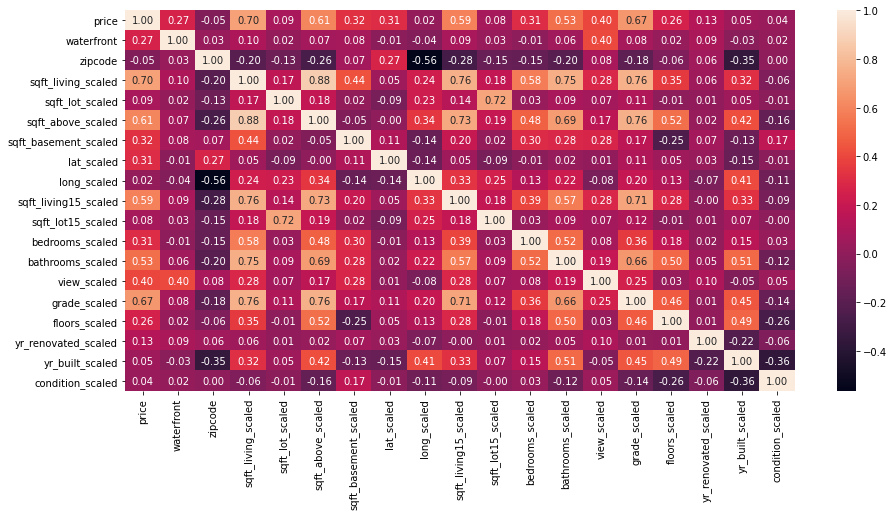

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Удалим столбцы, которые плохо коррелируют с целевым признаком 'price'

In [21]:
data.drop(['long_scaled' , 'zipcode', 'yr_built_scaled', 'condition_scaled', 'sqft_lot_scaled', 'sqft_lot15_scaled'], axis=1, inplace=True)

<AxesSubplot:>

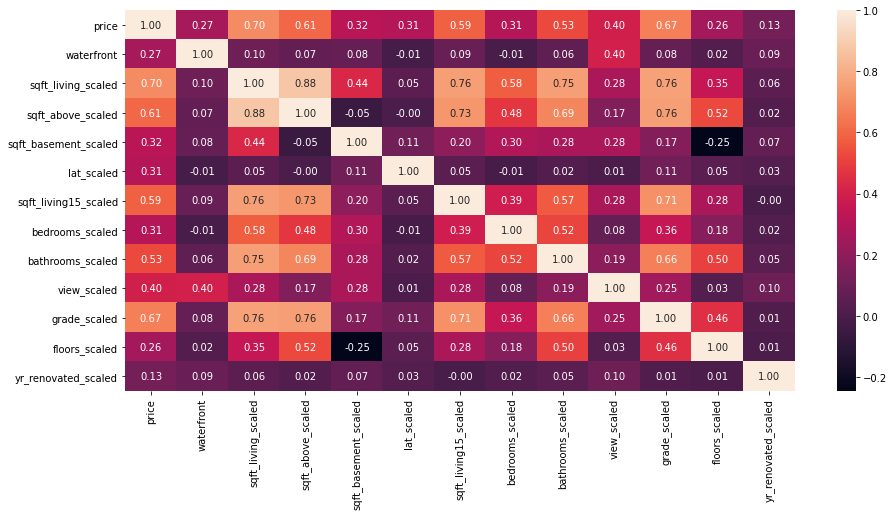

In [22]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

Вывод:
* Корреляционные матрицы для исходных и масштабированных данных совпадают.
* Целевой признак 'price' хорошо коррелирует с 'grade_scaled', 'sqft_living_scaled', 'sqft_living15_scaled', 'sqft_above_scaled', 'bathrooms_scaled', их точно надо оставить в модели регрессии
* Признаки 'long_scaled' , 'zipcode', 'yr_built', 'condition', 'sqft_lot_scaled', 'sqft_lot15_scaled' почти не коррелируют с целевым признаком, их лучше удалить из модели
* Большие по модулю значения коэффициентов корреляции свидетельствуют о значимой корреляции между исходными признаками и целевым признаком. На основании корреляционной матрицы можно сделать вывод о том, что данные позволяют построить модель машинного обучения.

## Выбор метрик для последующей оценки качества моделей.

В качестве метрик для решения задачи регрессии будем испсользовать: Mean Absolute Error, Mean Squared Error и r2 оценку.

### Сохранение и визуализация метрик

Разработаем класс, который поможет нам хранить метрики, их значения и визуализировать их.

In [23]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()  

## Выбор наиболее подходящих моделей для решения задачи классификации или регрессии.

Для задачи регрессии будем использовать следующие модели:

* Линейная регрессия
* Метод ближайших соседей
* Машина опорных векторов (линейный алгоритм)
* Решающее дерево
* Случайный лес
* Градиентный бустинг

## Формирование обучающей и тестовой выборок на основе исходного набора данных

In [24]:
data.columns

Index(['price', 'waterfront', 'sqft_living_scaled', 'sqft_above_scaled',
       'sqft_basement_scaled', 'lat_scaled', 'sqft_living15_scaled',
       'bedrooms_scaled', 'bathrooms_scaled', 'view_scaled', 'grade_scaled',
       'floors_scaled', 'yr_renovated_scaled'],
      dtype='object')

In [25]:
feature_cols = [
    'bedrooms_scaled', 'bathrooms_scaled', 'floors_scaled', 'waterfront', 'view_scaled',
    'grade_scaled', 'yr_renovated_scaled', 'sqft_living_scaled', 'sqft_above_scaled',
    'sqft_basement_scaled', 'lat_scaled', 'sqft_living15_scaled'
]
data_X = data.loc[:,feature_cols]
data_Y = data.loc[:, 'price']
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(data_X, data_Y,test_size=0.2, random_state=1)

## Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.

In [26]:
# Модели
regr_models = {'LR': LinearRegression(), 
               'KNN_1':KNeighborsRegressor(n_neighbors=1),
               'LinearSVR':LinearSVR(C=1.0),
               'Tree':DecisionTreeRegressor(),
               'RF':RandomForestRegressor(),
               'GB':GradientBoostingRegressor()}

In [27]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [28]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(data_X_train, data_y_train)
    y_pred = model.predict(data_X_test)
    
    mae = mean_absolute_error(data_y_test, y_pred)
    mse = mean_squared_error(data_y_test, y_pred)
    r2 = r2_score(data_y_test, y_pred)

    regrMetricLogger.add('MAE', model_name, mae)
    regrMetricLogger.add('MSE', model_name, mse)
    regrMetricLogger.add('R2', model_name, r2)    
    
    print('{} \t MAE={}, MSE={}, R2={}'.format(
        model_name, round(mae, 3), round(mse, 3), round(r2, 3)))

In [29]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

LR 	 MAE=136653.422, MSE=60599347912.745, R2=0.649
KNN_1 	 MAE=117071.057, MSE=55480600711.547, R2=0.679
LinearSVR 	 MAE=514663.235, MSE=435404175784.022, R2=-1.523
Tree 	 MAE=125079.57, MSE=60957821930.478, R2=0.647
RF 	 MAE=91576.642, MSE=32389789387.025, R2=0.812
GB 	 MAE=94569.69, MSE=32432160464.488, R2=0.812


## Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.

In [31]:
kn_n_range = np.array(range(1,15,1))
kn_tuned_parameters = [{'n_neighbors': kn_n_range}]
kn_tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}]

In [32]:
%%time
gs_kn = GridSearchCV(KNeighborsRegressor(), kn_tuned_parameters, cv=5, scoring='neg_mean_squared_error')
gs_kn.fit(data_X_train, data_y_train)

CPU times: user 49.7 s, sys: 4.3 ms, total: 49.7 s
Wall time: 49.8 s


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             scoring='neg_mean_squared_error')

In [33]:
# Лучшая модель
gs_kn.best_estimator_

KNeighborsRegressor(n_neighbors=10)

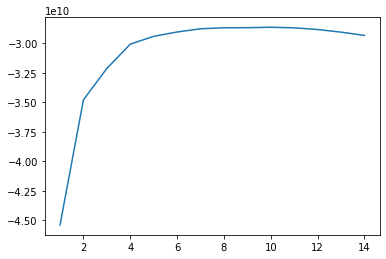

In [37]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(kn_n_range, gs_kn.cv_results_['mean_test_score'])

In [43]:
lsvr_c_range =  np.array(range(1,100000, 10000))
lsvr_tuned_parameters = [{'C': lsvr_c_range}]
lsvr_tuned_parameters

[{'C': array([    1, 10001, 20001, 30001, 40001, 50001, 60001, 70001, 80001,
         90001])}]

In [39]:
%%time
gs_lsvr = GridSearchCV(LinearSVR(), lsvr_tuned_parameters, cv=5, scoring='neg_mean_squared_error')
gs_lsvr.fit(data_X_train, data_y_train)

CPU times: user 7.12 s, sys: 5.25 s, total: 12.4 s
Wall time: 3.48 s


GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid=[{'C': array([    1, 10001, 20001, 30001, 40001, 50001, 60001, 70001, 80001,
       90001])}],
             scoring='neg_mean_squared_error')

In [40]:
# Лучшая модель
gs_lsvr.best_estimator_

LinearSVR(C=90001)

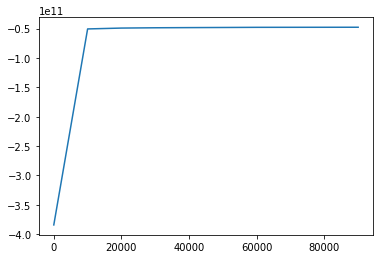

In [45]:
# Изменение качества на тестовой выборке в зависимости от C
plt.plot(lsvr_c_range, gs_lsvr.cv_results_['mean_test_score'])

In [87]:
tree_depth_range = np.array(range(3,11,1))
tree_tuned_parameters = [{'max_depth': tree_depth_range}]
tree_tuned_parameters

[{'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])}]

In [88]:
%%time
gs_tree = GridSearchCV(DecisionTreeRegressor(), tree_tuned_parameters, cv=5, scoring='neg_mean_squared_error')
gs_tree.fit(data_X_train, data_y_train)

CPU times: user 2.05 s, sys: 21 µs, total: 2.05 s
Wall time: 2.09 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])}],
             scoring='neg_mean_squared_error')

In [49]:
# Лучшая модель
gs_tree.best_estimator_

DecisionTreeRegressor(max_depth=9)

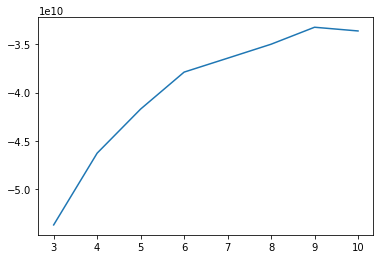

In [50]:
# Изменение качества на тестовой выборке в зависимости от глубины дерева
plt.plot(tree_depth_range, gs_tree.cv_results_['mean_test_score'])

In [73]:
rf_n_range = np.array(range(200,500,100))
rf_tuned_parameters = [{'n_estimators': rf_n_range}]
rf_tuned_parameters

[{'n_estimators': array([200, 300, 400])}]

In [80]:
%%time
gs_rf = GridSearchCV(RandomForestRegressor(), rf_tuned_parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs_rf.fit(data_X_train, data_y_train)

CPU times: user 19.2 s, sys: 251 ms, total: 19.4 s
Wall time: 2min 49s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([200, 300, 400])}],
             scoring='neg_mean_squared_error')

In [81]:
# Лучшая модель
gs_rf.best_estimator_

RandomForestRegressor(n_estimators=200)

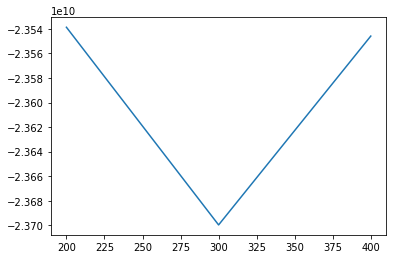

In [82]:
# Изменение качества на тестовой выборке в зависимости от n_estimators
plt.plot(rf_n_range, gs_rf.cv_results_['mean_test_score'])

In [83]:
%%time
gs_gb = GridSearchCV(GradientBoostingRegressor(), rf_tuned_parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs_gb.fit(data_X_train, data_y_train)

CPU times: user 9.77 s, sys: 6.56 ms, total: 9.78 s
Wall time: 45.2 s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'n_estimators': array([200, 300, 400])}],
             scoring='neg_mean_squared_error')

In [84]:
# Лучшая модель
gs_gb.best_estimator_

GradientBoostingRegressor(n_estimators=400)

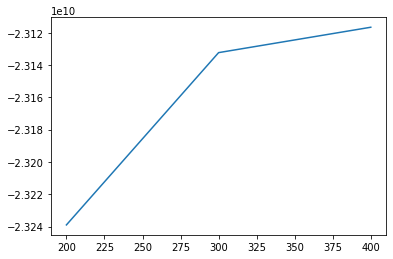

In [85]:
# Изменение качества на тестовой выборке в зависимости от n_estimators
plt.plot(rf_n_range, gs_gb.cv_results_['mean_test_score'])

## Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.

In [89]:
regr_models_grid = { 
    'KNN(best)':gs_kn.best_estimator_,
    'Tree(best)':gs_tree.best_estimator_,
    'LinearSVR(best)':gs_lsvr.best_estimator_,
    'RF(best)':gs_rf.best_estimator_,
    'GB(best)':gs_gb.best_estimator_
                   }

In [90]:
for model_name, model in regr_models_grid.items():
    regr_train_model(model_name, model, regrMetricLogger)

KNN(best) 	 MAE=96657.319, MSE=47779449527.494, R2=0.723
Tree(best) 	 MAE=108504.681, MSE=42722488692.848, R2=0.752
LinearSVR(best) 	 MAE=129267.13, MSE=71875871300.374, R2=0.584
RF(best) 	 MAE=91524.206, MSE=33475421722.717, R2=0.806
GB(best) 	 MAE=92487.687, MSE=30236231505.354, R2=0.825


## Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

In [91]:
# Метрики качества модели
regr_metrics = regrMetricLogger.df['metric'].unique()
regr_metrics

array(['MAE', 'MSE', 'R2'], dtype=object)

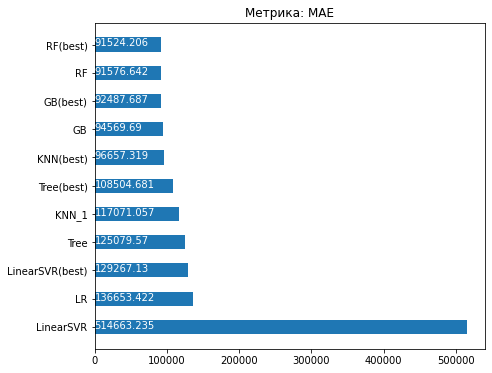

In [92]:
regrMetricLogger.plot('Метрика: ' + 'MAE', 'MAE', ascending=False, figsize=(7, 6))

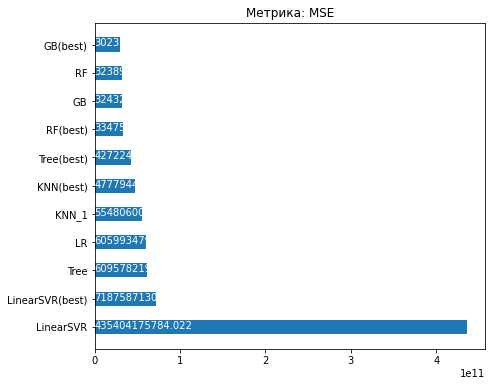

In [93]:
regrMetricLogger.plot('Метрика: ' + 'MSE', 'MSE', ascending=False, figsize=(7, 6))

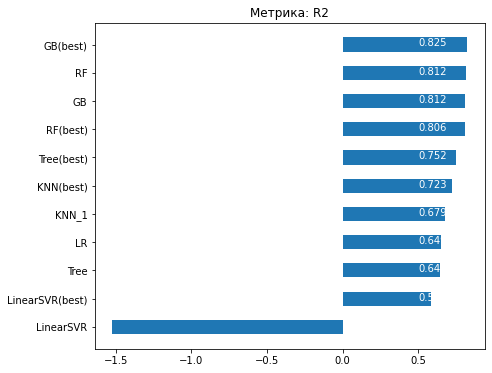

In [94]:
regrMetricLogger.plot('Метрика: ' + 'R2', 'R2', ascending=True, figsize=(7, 6))

## AutoML

In [76]:
import autosklearn.regression

In [78]:
automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=120, per_run_time_limit=30)
automl.fit(data_X_train, data_y_train)

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

In [79]:
predictions = automl.predict(data_X_test)
print("AutoML R2 score:", r2_score(data_y_test, predictions))

AutoML R2 score: 0.808234600610789


In [95]:
print(automl.show_models())

[(0.680000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessing:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.7727512096172742, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.22461598115758682, 'feature_preprocessor:feature_agglomeration:affinity': 'manhattan', 'feature_preprocessor:feature_agglomeration:linkage': 'complete', 'feature_preprocessor:feature_agglomeration:n_clusters': 21, 'feature_preprocessor:feature_agglomeration:pooling_func': 'max', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gr

## Вывод

Лучше всего себя показали ансамблевые модели градиентного бустинга и случаного леса. Самый лучший результат показывает модель градиентного бустинга(при n_estimators=400). Без подбора параметров модель случайного леса дает лучший результат. Худшей моделью оказалась LinearSVR, без подбора параметров дает вообще отрицательный результат по оценке r2. AutoML также выбрал модель градиентного бустинга как оптимальную. 